
# DATS 2102 — Week 6: Comparisons (Notebook)

**Week 6 — Comparisons** (Matplotlib only, one chart per figure).

In [1]:

# --- Setup ---
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

rng = np.random.default_rng(2102)

# plt.rcParams.update({"figure.dpi": 150, "savefig.dpi": 200})


## 1) Datasets (small real-world extracts)

In [2]:

# Gapminder-like subset (1997 & 2007 for selected countries)
gap_data = [
    ("China","Asia",1997,70.426,1230075000,2289.234136),
    ("China","Asia",2007,72.961,1318683096,4959.114854),
    ("India","Asia",1997,61.765,1012000000,1458.817442),
    ("India","Asia",2007,64.698,1110396331,2452.210407),
    ("United States","Americas",1997,76.81,272911760,35767.43303),
    ("United States","Americas",2007,78.242,301139947,42951.65309),
    ("Germany","Europe",1997,77.34,82164700,27788.88416),
    ("Germany","Europe",2007,79.406,82400996,32170.37442),
    ("Brazil","Americas",1997,69.388,168546719,7957.980824),
    ("Brazil","Americas",2007,72.39,190010647,9065.800825),
    ("South Africa","Africa",1997,53.365,42835005,7479.188244),
    ("South Africa","Africa",2007,49.339,43997828,9269.657808),
    ("Japan","Asia",1997,80.69,125956499,28816.58499),
    ("Japan","Asia",2007,82.603,127467972,31656.06806),
    ("Canada","Americas",1997,78.61,30305843,28954.92589),
    ("Canada","Americas",2007,80.653,33390141,36319.23501),
]
gap_columns = ["country","continent","year","lifeExp","pop","gdpPercap"]
gap_df = pd.DataFrame(gap_data, columns=gap_columns)
gap_df.head(10)


,country,continent,year,lifeExp,pop,gdpPercap
0,China,Asia,1997,70.426,1230075000,2289.234136
1,China,Asia,2007,72.961,1318683096,4959.114854
2,India,Asia,1997,61.765,1012000000,1458.817442
3,India,Asia,2007,64.698,1110396331,2452.210407
4,United States,Americas,1997,76.810,272911760,35767.433030
5,United States,Americas,2007,78.242,301139947,42951.653090
6,Germany,Europe,1997,77.340,82164700,27788.884160
7,Germany,Europe,2007,79.406,82400996,32170.374420
8,Brazil,Americas,1997,69.388,168546719,7957.980824
9,Brazil,Americas,2007,72.390,190010647,9065.800825


In [4]:

# Counts vs population (for normalization demo)
count_pop = pd.DataFrame({
    "place": ["Alpha City","Beta City","Gamma City","Delta City","Epsilon City","Zeta City","Eta City","Theta City"],
    "counts": [850, 1240, 3950, 610, 1780, 2410, 330, 990],
    "population": [150000, 420000, 1200000, 90000, 600000, 820000, 65000, 250000]
})
# CNTP_PATH = os.path.join(BASE_DIR, "counts_population.csv")
# count_pop.to_csv('counts_population.csv', index=False)
count_pop.head(8)


,place,counts,population
0,Alpha City,850,150000
1,Beta City,1240,420000
2,Gamma City,3950,1200000
3,Delta City,610,90000
4,Epsilon City,1780,600000
5,Zeta City,2410,820000
6,Eta City,330,65000
7,Theta City,990,250000


## 2) Clustered Bars vs. Cleveland Dot Plot

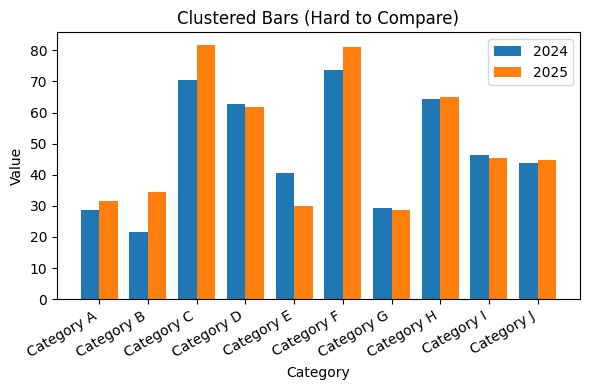

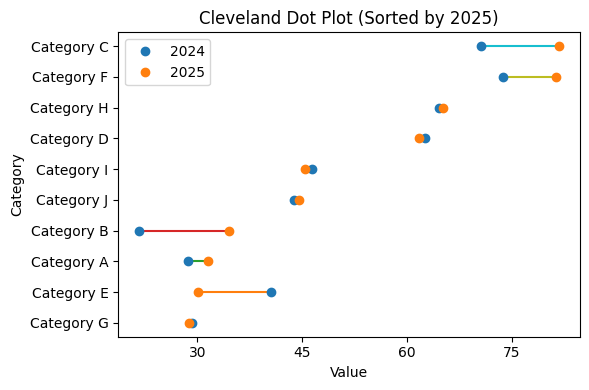

In [5]:

# Synthetic demo
cats = [f"Category {c}" for c in list("ABCDEFGHIJ")]
n = len(cats)
vals_2024 = np.round(rng.uniform(20, 80, size=n), 1)
vals_2025 = np.round(vals_2024 + rng.normal(0, 8, size=n), 1)

# A) Clustered bars (bad)
plt.figure(figsize=(6,4))
x = np.arange(n); w = 0.38
plt.bar(x - w/2, vals_2024, width=w, label="2024")
plt.bar(x + w/2, vals_2025, width=w, label="2025")
plt.xticks(x, cats, rotation=30, ha='right')
plt.title("Clustered Bars (Hard to Compare)")
plt.xlabel("Category")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

# B) Cleveland dot plot (sorted by 2025)
order = np.argsort(vals_2025)
cats_sorted = [cats[i] for i in order]
v24_sorted = vals_2024[order]
v25_sorted = vals_2025[order]

plt.figure(figsize=(6,4))
y = np.arange(n)
for i in range(n):
    plt.plot([v24_sorted[i], v25_sorted[i]], [y[i], y[i]])
plt.plot(v24_sorted, y, 'o', label="2024")
plt.plot(v25_sorted, y, 'o', label="2025")
plt.yticks(y, cats_sorted)
plt.xlabel("Value"); plt.ylabel("Category")
plt.title("Cleveland Dot Plot (Sorted by 2025)")
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6))
plt.tight_layout()
plt.show()

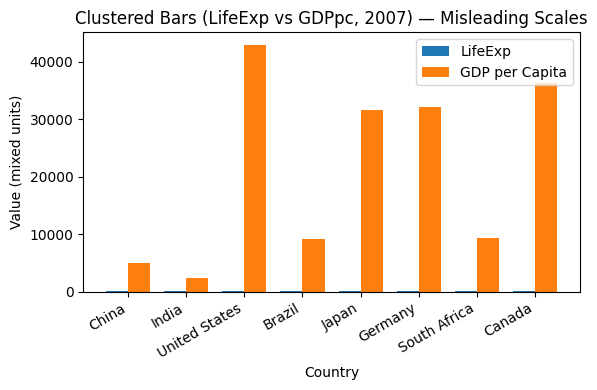

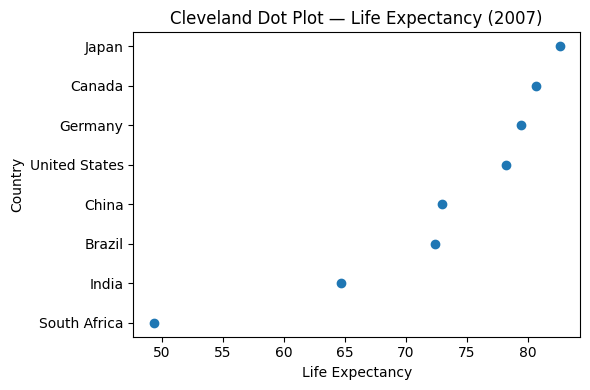

In [ ]:

# Real data variant (Gapminder 2007)
df = pd.read_csv('gapminder_subset.csv')
yr = df[df["year"]==2007].copy().sort_values("pop", ascending=False).head(10)
cats = yr["country"].tolist()
life = yr["lifeExp"].values
gdp  = yr["gdpPercap"].values

# Bad: mixed units in clustered bars
plt.figure(figsize=(6,4))
x = np.arange(len(cats)); w = 0.38
plt.bar(x - w/2, life, width=w, label="LifeExp")
plt.bar(x + w/2, gdp,  width=w, label="GDP per Capita")
plt.xticks(x, cats, rotation=30, ha='right')
plt.title("Clustered Bars (LifeExp vs GDPpc, 2007) — Misleading Scales")
plt.xlabel("Country")
plt.ylabel("Value (mixed units)")
plt.legend()
plt.tight_layout()
plt.show()

# Good: one metric, position on common scale
yr_sorted = yr.sort_values("lifeExp")
plt.figure(figsize=(6,4))
y = np.arange(len(yr_sorted))
plt.plot(yr_sorted["lifeExp"].values, y, 'o')
plt.yticks(y, yr_sorted["country"].values)
plt.xlabel("Life Expectancy"); plt.ylabel("Country")
plt.title("Cleveland Dot Plot — Life Expectancy (2007)")
plt.tight_layout()
plt.show()

## 3) Slopegraph (Before → After)

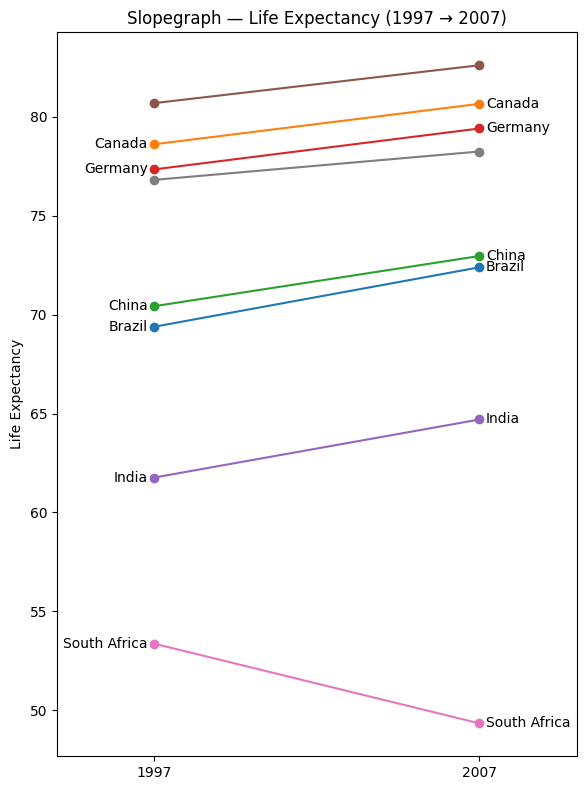

In [22]:

df = pd.read_csv('gapminder_subset.csv')
both = df[df["year"].isin([1997, 2007])]
have_both = both.groupby("country").filter(lambda g: g["year"].nunique()==2)
countries = have_both.groupby("country")["pop"].max().sort_values(ascending=False).head(12).index.tolist()

dd = df[df["country"].isin(countries) & df["year"].isin([1997, 2007])]
pivot = dd.pivot(index="country", columns="year", values="lifeExp").dropna()

plt.figure(figsize=(6,8))
for c in pivot.index:
    plt.plot([0,1], [pivot.loc[c, 1997], pivot.loc[c, 2007]], marker='o')
# annotate a few with largest absolute changes
changes = (pivot[2007] - pivot[1997]).abs().sort_values(ascending=False).head(6).index
for c in changes:
    plt.text(-0.02, pivot.loc[c, 1997], c, ha='right', va='center')
    plt.text(1.02,  pivot.loc[c, 2007], c, ha='left',  va='center')
plt.xticks([0,1], ["1997","2007"])
plt.ylabel("Life Expectancy")
plt.title("Slopegraph — Life Expectancy (1997 → 2007)")

plt.xlim(-0.3, 1.3)
# plt.ylim(30, 100)

plt.tight_layout()
plt.show()



## 4) Aligned vs. Independent Scales

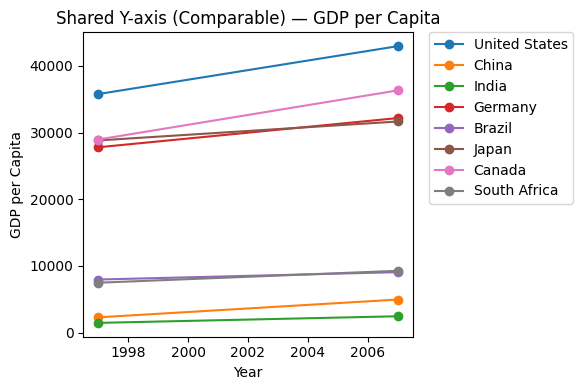

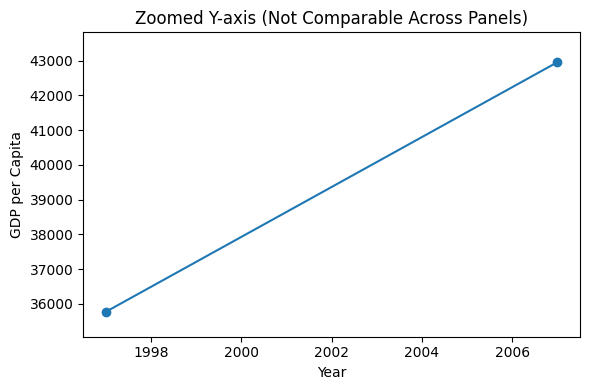

In [23]:
df = pd.read_csv('gapminder_subset.csv')
pivot = df.pivot(index="year", columns="country", values="gdpPercap")
countries = ["United States","China","India","Germany","Brazil","Japan","Canada","South Africa"]

# Shared scale
plt.figure(figsize=(6,4))
for c in countries:
    if c in pivot.columns:
        plt.plot(pivot.index, pivot[c], marker='o', label=c)
plt.xlabel("Year"); plt.ylabel("GDP per Capita")
plt.title("Shared Y-axis (Comparable) — GDP per Capita")
# plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) 

plt.tight_layout()
plt.show()

# Zoomed (independent) — focus one series
c0 = countries[0]
plt.figure(figsize=(6,4))
if c0 in pivot.columns:
    series = pivot[c0].dropna()
    plt.plot(series.index, series.values, marker='o', label=c0)
    plt.ylim(series.min()*0.98, series.max()*1.02)
plt.xlabel("Year"); plt.ylabel("GDP per Capita")
plt.title("Zoomed Y-axis (Not Comparable Across Panels)")
plt.tight_layout()
plt.show()

## 5) Normalization (Totals vs Per-Capita)

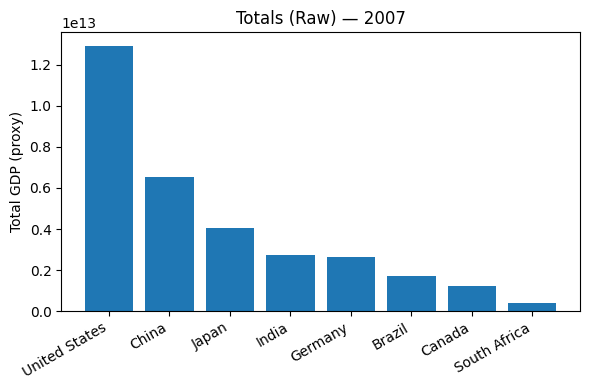

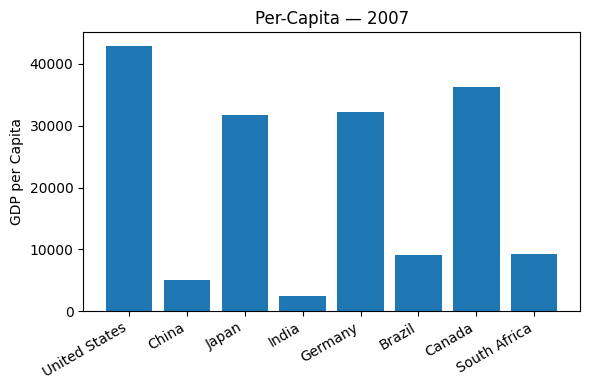

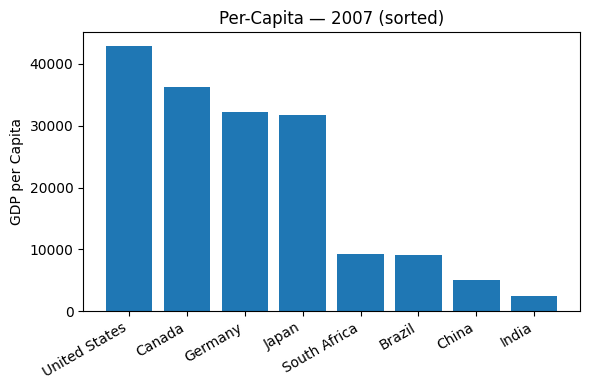

In [4]:

df = pd.read_csv('data/gapminder_subset.csv')
yr = df[df["year"]==2007].copy()
yr["gdp_total"] = yr["gdpPercap"] * yr["pop"]
yr = yr.sort_values("gdp_total", ascending=False)

# Totals (raw)
plt.figure(figsize=(6,4))
x = np.arange(len(yr))
plt.bar(x, yr["gdp_total"].values)
plt.xticks(x, yr["country"].values, rotation=30, ha='right')
plt.ylabel("Total GDP (proxy)")
plt.title("Totals (Raw) — 2007")
plt.tight_layout()
# totals_path = os.path.join(FIG_DIR, "norm_totals_2007.png")
# plt.savefig(totals_path)
plt.show()

# Per-capita (normalized)
plt.figure(figsize=(6,4))
plt.bar(x, yr["gdpPercap"].values)
plt.xticks(x, yr["country"].values, rotation=30, ha='right')
plt.ylabel("GDP per Capita")
plt.title("Per-Capita — 2007")
plt.tight_layout()
plt.show()

# Per-capita (normalized & sorted)
yr = yr.sort_values("gdpPercap", ascending=False)
plt.figure(figsize=(6,4))
plt.bar(x, yr["gdpPercap"].values)
plt.xticks(x, yr["country"].values, rotation=30, ha='right')
plt.ylabel("GDP per Capita")
plt.title("Per-Capita — 2007 (sorted)")
plt.tight_layout()
plt.show()

## 6) Uncertainty (95% CI)

<positron-console-cell-25>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


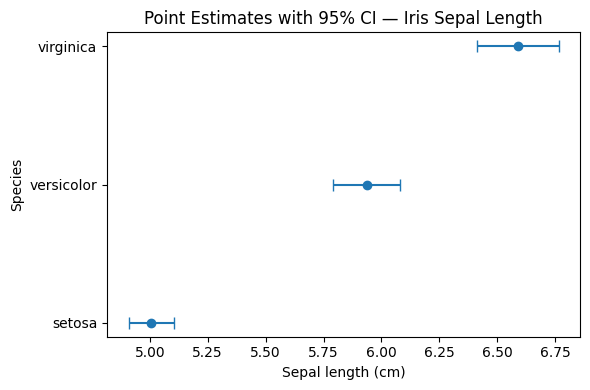

In [25]:

# Iris (real) or fallback synthetic if sklearn not available
try:
    from sklearn.datasets import load_iris
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)
    df = df.rename(columns={"sepal length (cm)": "sepal_length"})
except Exception:
    species = np.repeat(["setosa","versicolor","virginica"], 50)
    rng2 = np.random.default_rng(2102)
    sepal_length = np.concatenate([
        rng2.normal(5.0, 0.35, 50),
        rng2.normal(5.9, 0.45, 50),
        rng2.normal(6.5, 0.55, 50),
    ])
    df = pd.DataFrame({"species": species, "sepal_length": sepal_length})

g = df.groupby("species")["sepal_length"]
means = g.mean()
ses   = g.std(ddof=1) / np.sqrt(g.count())
ci95  = 1.96 * ses

plt.figure(figsize=(6,4))
y = np.arange(len(means.index))
plt.errorbar(means.values, y, xerr=ci95.values, fmt='o', capsize=4)
plt.yticks(y, means.index.tolist())
plt.xlabel("Sepal length (cm)"); plt.ylabel("Species")
plt.title("Point Estimates with 95% CI — Iris Sepal Length")
plt.tight_layout()
plt.show()

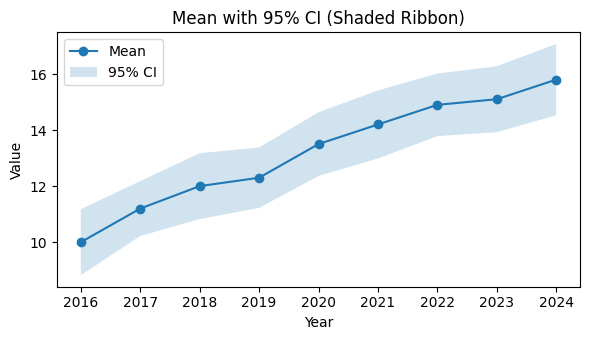

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Example inputs (replace with your arrays)
x    = np.arange(2016, 2025)
mean = np.array([10,11.2,12,12.3,13.5,14.2,14.9,15.1,15.8])
se   = np.array([0.6,0.5,0.6,0.55,0.58,0.62,0.57,0.6,0.65])

z = 1.96  # 95% CI
lo = mean - z*se
hi = mean + z*se

plt.figure(figsize=(6,3.5))
plt.plot(x, mean, marker='o', label="Mean")
plt.fill_between(x, lo, hi, alpha=0.2, label="95% CI")
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Mean with 95% CI (Shaded Ribbon)")
plt.legend()
plt.tight_layout()
plt.show()


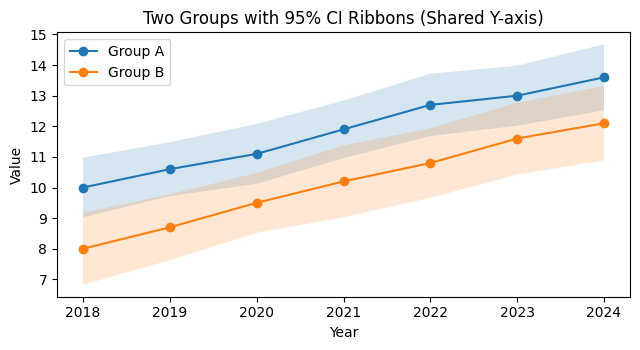

In [27]:
import numpy as np
import matplotlib.pyplot as plt

years = np.arange(2018, 2025)
A_mean = np.array([10,10.6,11.1,11.9,12.7,13.0,13.6])
A_se   = np.array([0.5,0.45,0.5,0.48,0.52,0.5,0.55])

B_mean = np.array([ 8, 8.7, 9.5,10.2,10.8,11.6,12.1])
B_se   = np.array([0.6,0.55,0.5,0.6,0.58,0.6,0.62])

z = 1.96
A_lo, A_hi = A_mean - z*A_se, A_mean + z*A_se
B_lo, B_hi = B_mean - z*B_se, B_mean + z*B_se

fig, ax = plt.subplots(figsize=(6.5,3.6))
ax.plot(years, A_mean, marker='o', label="Group A")
ax.fill_between(years, A_lo, A_hi, alpha=0.18)

ax.plot(years, B_mean, marker='o', label="Group B")
ax.fill_between(years, B_lo, B_hi, alpha=0.18)

ax.set_xlabel("Year")
ax.set_ylabel("Value")
ax.set_title("Two Groups with 95% CI Ribbons (Shared Y-axis)")
ax.legend()
fig.tight_layout()
plt.show()


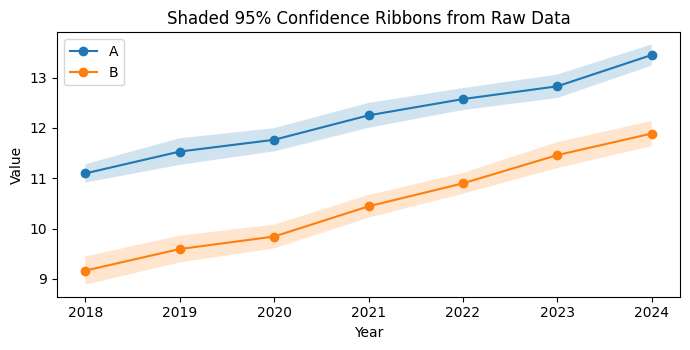

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# df must have columns: 'time', 'group', 'value'
# Example toy data:
rng = np.random.default_rng(2102)
times = np.tile(np.arange(2018, 2025), 2*50)             # 7 years × (2 groups × 50 samples)
groups = np.repeat(np.tile(["A","B"], 50*7), 1)
vals = (np.where(groups=="A", 11 + 0.4*(times-2018), 9 + 0.5*(times-2018))
        + rng.normal(0, 0.9, size=times.size))
df = pd.DataFrame({"time": times, "group": groups, "value": vals})

# summarize
g = df.groupby(["group","time"])["value"]
summary = g.agg(mean="mean", sd="std", n="count").reset_index()
summary["se"] = summary["sd"] / np.sqrt(summary["n"])
z = 1.96
summary["lo"] = summary["mean"] - z*summary["se"]
summary["hi"] = summary["mean"] + z*summary["se"]

# plot ribbons
fig, ax = plt.subplots(figsize=(7,3.6))
for grp, sub in summary.groupby("group"):
    ax.plot(sub["time"], sub["mean"], marker='o', label=grp)
    ax.fill_between(sub["time"], sub["lo"], sub["hi"], alpha=0.2)

ax.set_xlabel("Year"); ax.set_ylabel("Value")
ax.set_title("Shaded 95% Confidence Ribbons from Raw Data")
ax.legend()
fig.tight_layout()
plt.show()
